In [1]:
#Load Libraries
import pandas as pd
import numpy as np
import pandas as pd
import sqlite3 as sqlite3
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [2]:
%%time
train_df=pd.read_csv('imputed_training_data.csv')
columns=list(train_df.columns)

Wall time: 3.98 s


In [3]:
train_df.shape

(1247175, 36)

In [4]:
xTrain=train_df.loc[:,train_df.columns != 'STAT_CAUSE_DESCR']
yTrain=train_df['STAT_CAUSE_DESCR']

In [5]:
xTrain

,CONT_DUR,LONGITUDE,LATITUDE,DISCOVERY_DATE,DISCOVERY_DOY,FIRE_SIZE,NWCG_REPORTING_AGENCY_BIA,NWCG_REPORTING_AGENCY_BLM,NWCG_REPORTING_AGENCY_BOR,NWCG_REPORTING_AGENCY_DOD,...,OWNER_CODE_6.0,OWNER_CODE_7.0,OWNER_CODE_8.0,OWNER_CODE_9.0,OWNER_CODE_10.0,OWNER_CODE_11.0,OWNER_CODE_12.0,OWNER_CODE_13.0,OWNER_CODE_14.0,OWNER_CODE_15.0
0,0.000000,-89.398528,40.633125,2455540.5,344.0,1.00,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.749437,-75.884090,38.285830,2453786.5,51.0,0.80,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.000000,-95.333600,34.800100,2449461.5,109.0,2.00,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.982555,-92.702004,46.231811,2452880.5,241.0,3.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.000000,-83.832500,32.664200,2451804.5,261.0,2.78,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247170,0.000000,-82.112250,35.385150,2456026.5,100.0,3.60,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1247171,0.000000,-110.990000,45.505000,2450983.5,170.0,0.10,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1247172,0.115485,-83.277849,32.296744,2455080.5,249.0,0.08,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1247173,4.000000,-116.393889,47.010278,2456874.5,217.0,0.30,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
yTrain

0          Debris Burning
1          Debris Burning
2          Debris Burning
3                   Arson
4                 Smoking
                ...      
1247170    Debris Burning
1247171          Campfire
1247172     Equipment Use
1247173         Lightning
1247174             Arson
Name: STAT_CAUSE_DESCR, Length: 1247175, dtype: object

In [7]:
counts = yTrain.value_counts()

def count_over_10000(colname):
    if counts[colname] > 10000:
        return 10000
    return counts[colname]

#Perform undersampling
UnderSampleRatio = {
    'Lightning' : count_over_10000('Lightning'), 'Debris Burning' : count_over_10000('Debris Burning'), 'Campfire' : count_over_10000('Campfire'), 
    'Equipment Use' : count_over_10000('Equipment Use'),    
    'Arson' : count_over_10000('Arson'), 'Children' : count_over_10000('Children'), 'Railroad' : count_over_10000('Railroad'),
    'Smoking' : count_over_10000('Smoking'), 'Powerline' : count_over_10000('Powerline'),
    'Fireworks' : count_over_10000('Fireworks'), 'Structure' : count_over_10000('Structure')
}

newSampStrat=RandomUnderSampler(sampling_strategy=UnderSampleRatio,random_state=441) #Goal balance all classes
xTrain,yTrain=newSampStrat.fit_resample(xTrain,yTrain) #perform the balancing newX and newY are balanced X and y

In [8]:
xTrain

,CONT_DUR,LONGITUDE,LATITUDE,DISCOVERY_DATE,DISCOVERY_DOY,FIRE_SIZE,NWCG_REPORTING_AGENCY_BIA,NWCG_REPORTING_AGENCY_BLM,NWCG_REPORTING_AGENCY_BOR,NWCG_REPORTING_AGENCY_DOD,...,OWNER_CODE_6.0,OWNER_CODE_7.0,OWNER_CODE_8.0,OWNER_CODE_9.0,OWNER_CODE_10.0,OWNER_CODE_11.0,OWNER_CODE_12.0,OWNER_CODE_13.0,OWNER_CODE_14.0,OWNER_CODE_15.0
0,1.0,-83.638611,44.639444,2456012.5,86.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,-100.597200,43.376400,2457218.5,196.0,0.1,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,-83.612300,32.029900,2451947.5,38.0,7.5,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,-98.819200,47.924700,2456799.5,142.0,0.5,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,-98.792100,47.933100,2452375.5,101.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103381,0.0,-102.501500,43.023300,2451082.5,269.0,0.1,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103382,0.0,-102.250400,43.499700,2452214.5,305.0,0.1,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103383,1.0,-107.684000,42.350000,2449930.5,213.0,26.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103384,0.0,-102.551700,43.030600,2453943.5,208.0,0.1,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
yTrain

0             Arson
1             Arson
2             Arson
3             Arson
4             Arson
            ...    
103381    Structure
103382    Structure
103383    Structure
103384    Structure
103385    Structure
Name: STAT_CAUSE_DESCR, Length: 103386, dtype: object

In [10]:
counts = yTrain.value_counts()
counts

Equipment Use     10000
Debris Burning    10000
Lightning         10000
Railroad          10000
Smoking           10000
Powerline         10000
Fireworks         10000
Children          10000
Arson             10000
Campfire          10000
Structure          3386
Name: STAT_CAUSE_DESCR, dtype: int64

In [11]:
xTrain.shape

(103386, 35)

In [12]:
xTrain

,CONT_DUR,LONGITUDE,LATITUDE,DISCOVERY_DATE,DISCOVERY_DOY,FIRE_SIZE,NWCG_REPORTING_AGENCY_BIA,NWCG_REPORTING_AGENCY_BLM,NWCG_REPORTING_AGENCY_BOR,NWCG_REPORTING_AGENCY_DOD,...,OWNER_CODE_6.0,OWNER_CODE_7.0,OWNER_CODE_8.0,OWNER_CODE_9.0,OWNER_CODE_10.0,OWNER_CODE_11.0,OWNER_CODE_12.0,OWNER_CODE_13.0,OWNER_CODE_14.0,OWNER_CODE_15.0
0,1.0,-83.638611,44.639444,2456012.5,86.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,-100.597200,43.376400,2457218.5,196.0,0.1,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,-83.612300,32.029900,2451947.5,38.0,7.5,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,-98.819200,47.924700,2456799.5,142.0,0.5,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,-98.792100,47.933100,2452375.5,101.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103381,0.0,-102.501500,43.023300,2451082.5,269.0,0.1,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103382,0.0,-102.250400,43.499700,2452214.5,305.0,0.1,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103383,1.0,-107.684000,42.350000,2449930.5,213.0,26.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103384,0.0,-102.551700,43.030600,2453943.5,208.0,0.1,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Wall time: 898 ms


<AxesSubplot:xlabel='STAT_CAUSE_DESCR'>

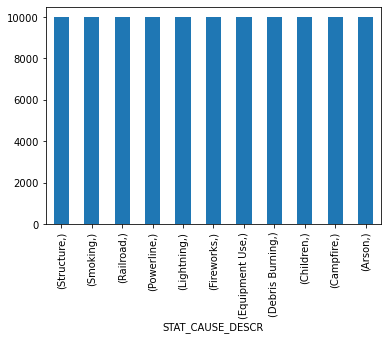

In [13]:
%%time
oversample = SMOTE()
xTrain, yTrain = oversample.fit_resample(xTrain, yTrain)

dfy = pd.DataFrame(yTrain)
dfy.value_counts().plot.bar()

In [14]:
smote_df=pd.DataFrame(xTrain,columns=columns[0:(len(columns)-1)])
smote_df['STAT_CAUSE_DESCR']=yTrain

In [15]:
smote_df

,CONT_DUR,LONGITUDE,LATITUDE,DISCOVERY_DATE,DISCOVERY_DOY,FIRE_SIZE,NWCG_REPORTING_AGENCY_BIA,NWCG_REPORTING_AGENCY_BLM,NWCG_REPORTING_AGENCY_BOR,NWCG_REPORTING_AGENCY_DOD,...,OWNER_CODE_7.0,OWNER_CODE_8.0,OWNER_CODE_9.0,OWNER_CODE_10.0,OWNER_CODE_11.0,OWNER_CODE_12.0,OWNER_CODE_13.0,OWNER_CODE_14.0,OWNER_CODE_15.0,STAT_CAUSE_DESCR
0,1.000000,-83.638611,44.639444,2.456012e+06,86.000000,3.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Arson
1,0.000000,-100.597200,43.376400,2.457218e+06,196.000000,0.100000,1.000000,0.000000,0.0,0.0,...,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Arson
2,0.000000,-83.612300,32.029900,2.451948e+06,38.000000,7.500000,0.000000,0.000000,0.0,0.0,...,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Arson
3,0.000000,-98.819200,47.924700,2.456800e+06,142.000000,0.500000,1.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Arson
4,30.000000,-98.792100,47.933100,2.452376e+06,101.000000,2.000000,1.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Arson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109995,5.540686,-148.120009,62.985634,2.450595e+06,146.022354,0.302235,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Structure
109996,10.891973,-121.925220,42.239831,2.453627e+06,208.120607,52508.134646,0.469848,0.530152,0.0,0.0,...,0.0,0.530152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Structure
109997,5.575254,-149.585410,61.653134,2.451684e+06,140.313245,0.100000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Structure
109998,0.000000,-105.353550,39.128340,2.451330e+06,151.317914,0.100000,1.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Structure


In [20]:
smote_df['OWNER_CODE_12.0'].unique()

array([0.        , 1.        , 0.70367942, 0.79732867, 0.87831186,
       0.82273558, 0.46165012, 0.60100198, 0.54712635, 0.23434372,
       0.53404773, 0.03703759, 0.16961051, 0.36897556, 0.18069676,
       0.39169481, 0.45262549, 0.4613927 , 0.87905853, 0.64342082,
       0.38931512, 0.06019429, 0.44237113, 0.75149202, 0.2675819 ,
       0.56252912, 0.5640528 , 0.08121574, 0.84089769, 0.56830097,
       0.2111016 , 0.61160916])